# EDA

This notebook explores the dataset, which then will be used for yield prediction. First, some preparation mush be done.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_pickle("train.pkl")
data

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,crop_type,field_info,harvest_mean,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,...,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std,px_num,tile_number,valid_px_proportion
0,0.854710,0.722707,0.000000,0.0,Corn,50787_2020,174.499496,0.0,0.0,0.047707,...,0.000115,4.279285e-06,0.0,0.0,0.0,32053.666016,2460.160156,32060.0,1.0,0.030575
1,0.841044,0.346638,0.000883,0.0,Corn,50787_2020,211.255692,0.0,0.0,0.138608,...,0.000137,0.000000e+00,0.0,0.0,0.0,32900.351562,440.999817,252497.0,2.0,0.240800
2,0.117885,0.526473,0.243028,0.0,Corn,50787_2020,189.610092,0.0,0.0,0.014408,...,0.000137,0.000000e+00,0.0,0.0,0.0,32951.636719,320.363617,212309.0,3.0,0.202474
4,0.091827,0.699622,0.306191,0.0,Corn,50787_2020,174.854385,0.0,0.0,0.866611,...,0.000137,2.099477e-07,0.0,0.0,0.0,32930.121094,504.934814,59525.0,5.0,0.056767
5,0.078351,0.672237,0.000000,0.0,Corn,50787_2020,231.198898,0.0,0.0,0.504748,...,0.000137,0.000000e+00,0.0,0.0,0.0,32905.542969,297.537506,163011.0,6.0,0.155459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,0.000000,0.080196,0.024455,0.0,Corn,72_2020,236.343155,0.0,0.0,0.000000,...,0.000018,1.195773e-04,0.0,0.0,0.0,37169.433594,762.507446,350392.0,8.0,0.334160
8,0.000000,0.080293,0.024159,0.0,Corn,72_2020,232.948776,0.0,0.0,0.000304,...,0.000014,1.225625e-04,0.0,0.0,0.0,37178.828125,994.355103,1030338.0,9.0,0.982607
9,0.001870,0.111908,0.027459,0.0,Corn,72_2020,233.594147,0.0,0.0,0.002601,...,0.000008,1.297594e-04,0.0,0.0,0.0,37316.613281,528.748291,1044561.0,10.0,0.996171
10,0.320803,0.030918,0.000000,0.0,Corn,72_2020,231.707611,0.0,0.0,0.000000,...,0.000008,1.291121e-04,0.0,0.0,0.0,37327.144531,543.739136,1043293.0,11.0,0.994962


# The Basics
This block shows the basic description of our data.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10536 entries, 0 to 11
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Low Emergence_mean        10536 non-null  float64
 1   New yield risk_mean       10536 non-null  float64
 2   Nutrient Deficiency_mean  10536 non-null  float64
 3   Replant Risk_mean         10536 non-null  float64
 4   crop_type                 10536 non-null  object 
 5   field_info                10536 non-null  object 
 6   harvest_mean              10536 non-null  float64
 7   ndvi_hist_0               10536 non-null  float64
 8   ndvi_hist_1               10536 non-null  float64
 9   ndvi_hist_10              10536 non-null  float64
 10  ndvi_hist_11              10536 non-null  float64
 11  ndvi_hist_12              10536 non-null  float64
 12  ndvi_hist_13              10536 non-null  float64
 13  ndvi_hist_14              10536 non-null  float64
 14  ndvi_hist

In [4]:
# unnecessary or constant info in crop_type, field_info, tile_number 
data = data.drop(columns=['crop_type', 'field_info', 'tile_number'])

In [5]:
data.describe()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,harvest_mean,ndvi_hist_0,ndvi_hist_1,ndvi_hist_10,ndvi_hist_11,ndvi_hist_12,...,planter_hist_3,planter_hist_4,planter_hist_5,planter_hist_6,planter_hist_7,planter_hist_8,planter_mean,planter_std,px_num,valid_px_proportion
count,10536.000000,10536.000000,10536.000000,10536.000000,10536.000000,10536.0,1.053600e+04,10536.000000,10536.000000,10536.000000,...,1.053600e+04,10536.000000,1.053600e+04,10536.0,10536.0,10536.0,10536.000000,10536.000000,1.053600e+04,10536.000000
mean,0.203087,0.220602,0.133807,0.033178,224.726271,0.0,8.300462e-08,0.341343,3.648716,3.654709,...,1.103351e-06,0.000098,3.830799e-05,0.0,0.0,0.0,35162.378046,1013.139056,7.179752e+05,0.684715
std,0.329492,0.344606,0.318225,0.138439,39.268998,0.0,8.520010e-06,1.230351,2.628220,2.009006,...,3.931600e-06,0.000050,5.070138e-05,0.0,0.0,0.0,1733.244451,801.334766,3.674691e+05,0.350446
min,0.000000,0.000000,0.000000,0.000000,50.441578,0.0,0.000000e+00,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000e+00,0.0,0.0,0.0,25389.802734,0.000000,1.900000e+01,0.000018
25%,0.000000,0.000316,0.000000,0.000000,204.053043,0.0,0.000000e+00,0.000009,1.312170,2.276084,...,0.000000e+00,0.000059,3.103065e-08,0.0,0.0,0.0,34123.598633,413.369881,3.682198e+05,0.351162
50%,0.032982,0.061903,0.000000,0.000000,231.903946,0.0,0.000000e+00,0.000920,3.410753,3.640636,...,8.085457e-08,0.000126,8.573198e-06,0.0,0.0,0.0,35504.556641,775.940338,9.332980e+05,0.890062
75%,0.292389,0.292154,0.085702,0.000000,250.606483,0.0,0.000000e+00,0.048927,5.814094,5.068253,...,8.931153e-07,0.000136,7.680413e-05,0.0,0.0,0.0,36290.360352,1449.397980,1.036664e+06,0.988640
max,3.356656,2.798137,3.317399,2.489798,366.780670,0.0,8.745366e-04,9.500000,9.500000,9.323266,...,1.373312e-04,0.000137,1.373312e-04,0.0,0.0,0.0,39308.273438,7586.876465,1.047940e+06,0.999393


In [6]:
data.isna().sum()

Low Emergence_mean          0
New yield risk_mean         0
Nutrient Deficiency_mean    0
Replant Risk_mean           0
harvest_mean                0
ndvi_hist_0                 0
ndvi_hist_1                 0
ndvi_hist_10                0
ndvi_hist_11                0
ndvi_hist_12                0
ndvi_hist_13                0
ndvi_hist_14                0
ndvi_hist_15                0
ndvi_hist_16                0
ndvi_hist_17                0
ndvi_hist_18                0
ndvi_hist_2                 0
ndvi_hist_3                 0
ndvi_hist_4                 0
ndvi_hist_5                 0
ndvi_hist_6                 0
ndvi_hist_7                 0
ndvi_hist_8                 0
ndvi_hist_9                 0
ndvi_mean                   0
ndvi_std                    0
planter_hist_0              0
planter_hist_1              0
planter_hist_2              0
planter_hist_3              0
planter_hist_4              0
planter_hist_5              0
planter_hist_6              0
planter_hi

In [7]:
(data == 0).sum(axis=0)

Low Emergence_mean           4143
New yield risk_mean          2573
Nutrient Deficiency_mean     5745
Replant Risk_mean            8601
harvest_mean                    0
ndvi_hist_0                 10536
ndvi_hist_1                 10535
ndvi_hist_10                 2467
ndvi_hist_11                  256
ndvi_hist_12                   94
ndvi_hist_13                  217
ndvi_hist_14                 1044
ndvi_hist_15                 2974
ndvi_hist_16                 5377
ndvi_hist_17                 8043
ndvi_hist_18                10296
ndvi_hist_2                 10535
ndvi_hist_3                 10534
ndvi_hist_4                 10529
ndvi_hist_5                 10526
ndvi_hist_6                 10502
ndvi_hist_7                 10403
ndvi_hist_8                  9981
ndvi_hist_9                  7963
ndvi_mean                       0
ndvi_std                        0
planter_hist_0              10536
planter_hist_1              10536
planter_hist_2               5452
planter_hist_3

In [8]:
# Let's explore the columns with very few non-zero values - ndvi-hist 1-5
for i in range(1,6):
    col = 'ndvi_hist_' + str(i)
    print(data[data[col]!=0][col])

17    0.000875
Name: ndvi_hist_1, dtype: float64
17    0.007922
Name: ndvi_hist_2, dtype: float64
17    0.025677
16    0.000013
Name: ndvi_hist_3, dtype: float64
17    0.033680
77    0.000011
79    0.000009
87    0.000018
53    0.000028
62    0.000022
18    0.000102
Name: ndvi_hist_4, dtype: float64
17    0.029643
77    0.000032
67    0.000010
81    0.000063
52    0.000009
53    0.000381
31    0.000011
49    0.000034
93    0.000009
18    0.000034
Name: ndvi_hist_5, dtype: float64


### Conclusion
There are non null values, columns *planter_hist_0, planter_hist_1, planter_hist_6, planter_hist_7, planter_hist_8, ndvi_hist_0* are all zero, so we'll drop them. 
For the columns with less than 10 non-zero values, we can test out dropping them and noting the difference in scores during training (spoiler alert: there's absolutely no difference).

In [9]:
# ndvi_hist_0, planter_hist_0,1,6,7,8 are all 0
data = data.drop(columns=['ndvi_hist_0', 'planter_hist_0', 'planter_hist_1', 'planter_hist_6', 'planter_hist_7', 'planter_hist_8'])

# Visualization and Correlation

In [10]:
# see new numbering of columns
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10536 entries, 0 to 11
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Low Emergence_mean        10536 non-null  float64
 1   New yield risk_mean       10536 non-null  float64
 2   Nutrient Deficiency_mean  10536 non-null  float64
 3   Replant Risk_mean         10536 non-null  float64
 4   harvest_mean              10536 non-null  float64
 5   ndvi_hist_1               10536 non-null  float64
 6   ndvi_hist_10              10536 non-null  float64
 7   ndvi_hist_11              10536 non-null  float64
 8   ndvi_hist_12              10536 non-null  float64
 9   ndvi_hist_13              10536 non-null  float64
 10  ndvi_hist_14              10536 non-null  float64
 11  ndvi_hist_15              10536 non-null  float64
 12  ndvi_hist_16              10536 non-null  float64
 13  ndvi_hist_17              10536 non-null  float64
 14  ndvi_hist

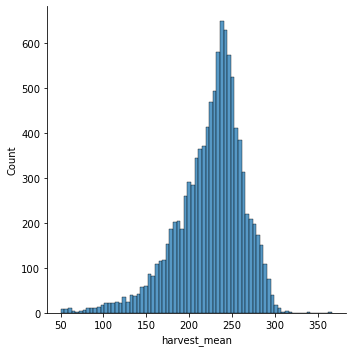

In [11]:
sns.displot(data, x="harvest_mean")

In [19]:
# Let's explore the columns with very few non-zero values - ndvi-hist 1-5
for i in range(1,6):
    col = 'ndvi_hist_' + str(i)
    print(data[data[col]!=0][[col, 'harvest_mean']])

    ndvi_hist_1  harvest_mean
17     0.000875    207.211243
    ndvi_hist_2  harvest_mean
17     0.007922    207.211243
    ndvi_hist_3  harvest_mean
17     0.025677    207.211243
16     0.000013    174.225357
    ndvi_hist_4  harvest_mean
17     0.033680    207.211243
77     0.000011    225.182159
79     0.000009    118.935593
87     0.000018    232.878860
53     0.000028    240.579178
62     0.000022    236.690231
18     0.000102    223.254990
    ndvi_hist_5  harvest_mean
17     0.029643    207.211243
77     0.000032    225.182159
67     0.000010    222.641037
81     0.000063    236.387527
52     0.000009    243.751404
53     0.000381    240.579178
31     0.000011    187.017212
49     0.000034    182.102798
93     0.000009    233.126862
18     0.000034    223.254990


,px_num,valid_px_proportion
px_num,1.0,1.0
valid_px_proportion,1.0,1.0


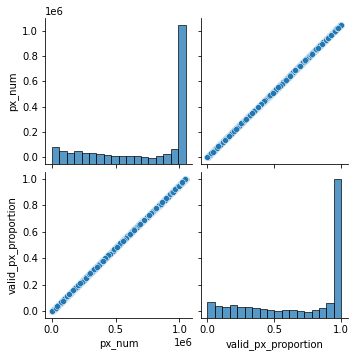

In [12]:
sns.pairplot(data[data.columns[31:]])
data[data.columns[31:]].corr()

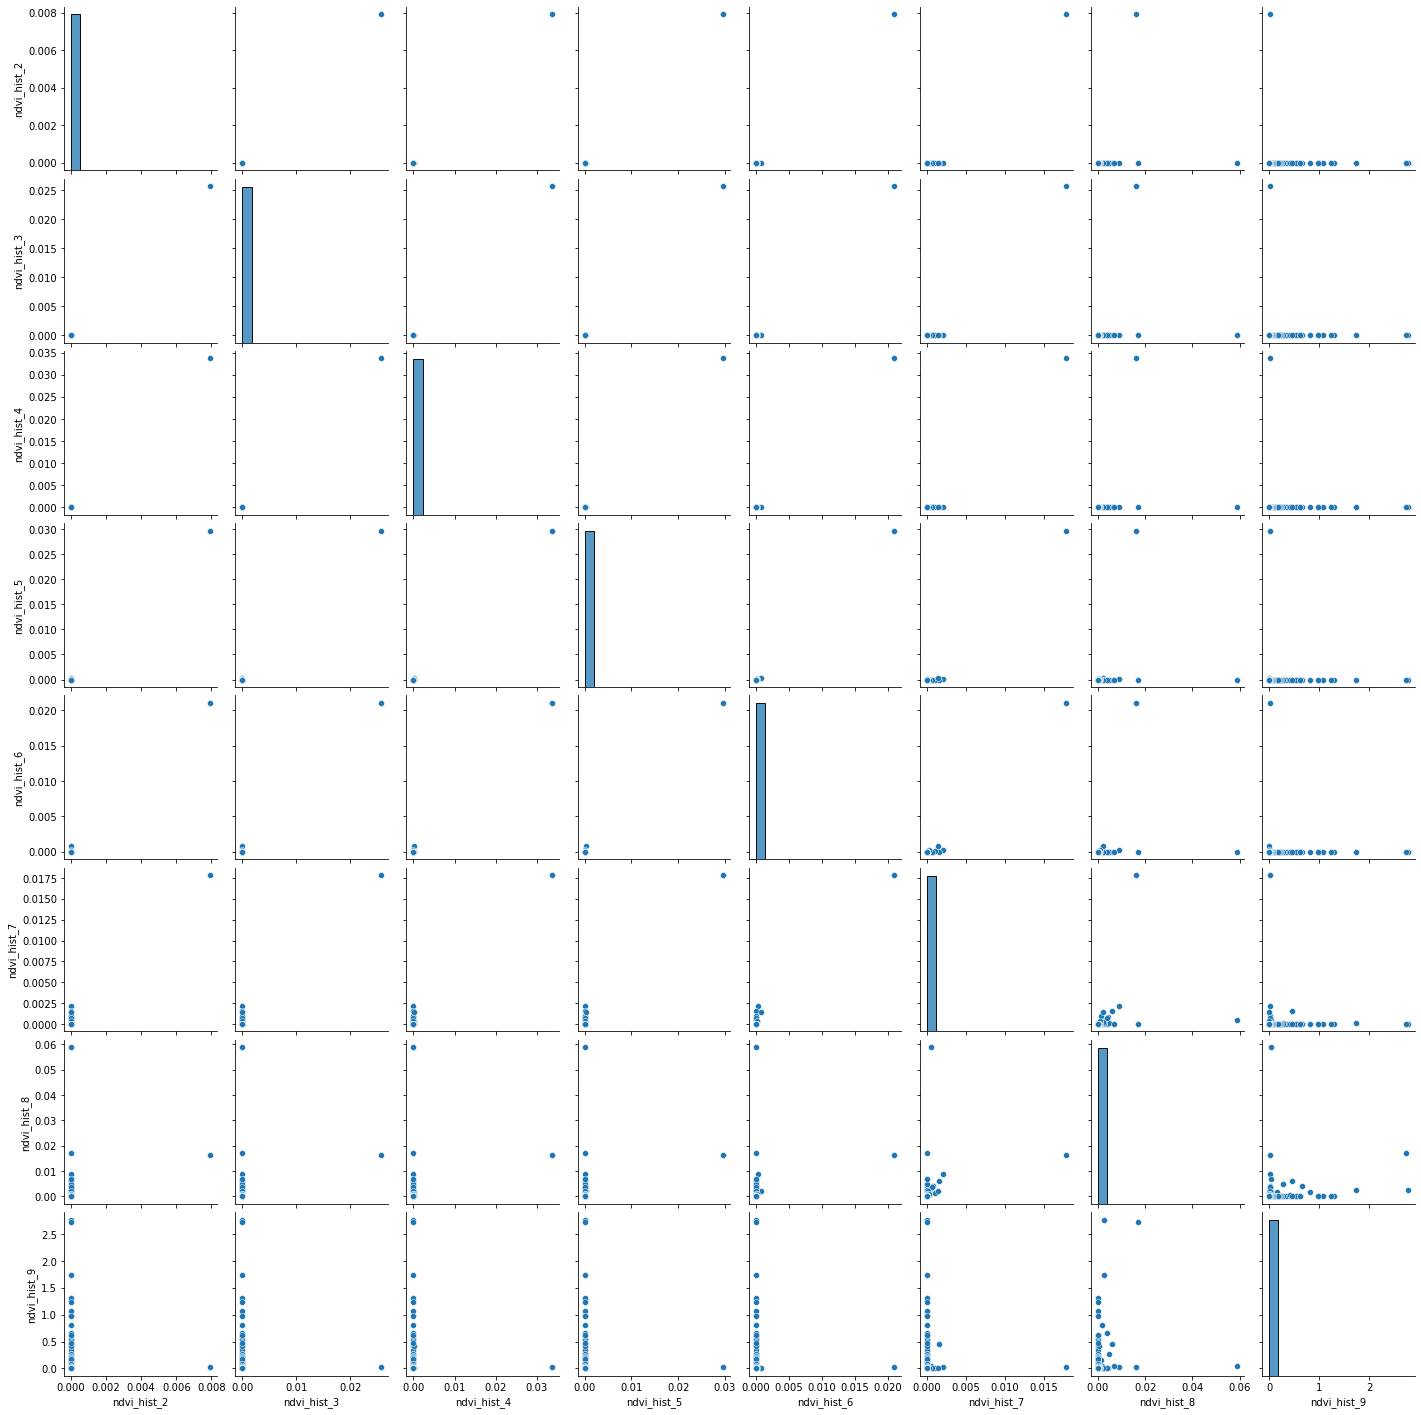

In [13]:
# ndvi columns correlation
sns.pairplot(data[data.columns[15:23]])

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,harvest_mean
Low Emergence_mean,1.000000,0.049296,0.116645,0.022330,-0.145118
New yield risk_mean,0.049296,1.000000,0.164102,0.119936,-0.194361
Nutrient Deficiency_mean,0.116645,0.164102,1.000000,0.067127,-0.318430
Replant Risk_mean,0.022330,0.119936,0.067127,1.000000,-0.197401
harvest_mean,-0.145118,-0.194361,-0.318430,-0.197401,1.000000


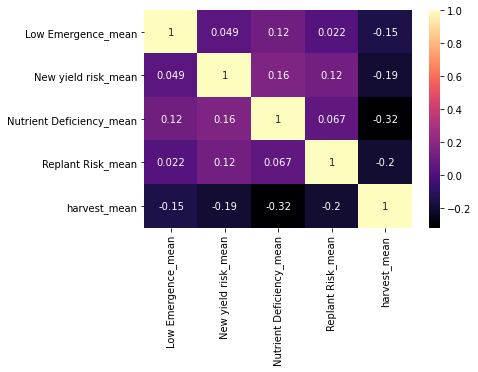

In [15]:
heatmap_columns = data[data.columns[0:5]]
sns.heatmap(heatmap_columns.corr(), annot=True, cmap='magma')
heatmap_columns.corr()

,Low Emergence_mean,New yield risk_mean,Nutrient Deficiency_mean,Replant Risk_mean,harvest_mean,ndvi_hist_9,ndvi_mean,ndvi_std,planter_hist_2,planter_hist_3,planter_hist_4,planter_hist_5,planter_mean,planter_std,px_num,valid_px_proportion,ndvi_hist_3,ndvi_hist_4
Low Emergence_mean,1.000000,0.049296,0.116645,0.022330,-0.145118,0.045700,-0.033828,0.000581,0.090279,0.018946,-0.008750,0.005616,0.004127,0.092405,-0.027446,-0.027446,-0.004676,-0.004665
New yield risk_mean,0.049296,1.000000,0.164102,0.119936,-0.194361,0.063165,-0.104706,-0.132841,0.027228,0.092867,-0.045789,0.037884,-0.044390,0.171358,-0.090333,-0.090333,0.001296,0.001286
Nutrient Deficiency_mean,0.116645,0.164102,1.000000,0.067127,-0.318430,-0.008126,0.024047,0.014223,0.011559,0.034281,0.011171,-0.013985,-0.063359,0.077702,-0.058818,-0.058818,-0.001007,-0.000967
Replant Risk_mean,0.022330,0.119936,0.067127,1.000000,-0.197401,0.005518,-0.020390,0.029101,0.015009,0.085466,0.073996,-0.080548,-0.164638,0.086717,-0.105102,-0.105102,-0.002317,-0.002343
harvest_mean,-0.145118,-0.194361,-0.318430,-0.197401,1.000000,-0.003862,0.007802,0.027003,-0.086304,-0.182045,-0.233259,0.247840,0.400577,-0.201516,0.238427,0.238427,-0.004352,-0.004348
ndvi_hist_9,0.045700,0.063165,-0.008126,0.005518,-0.003862,1.000000,-0.100321,-0.016211,-0.003313,-0.001763,-0.042509,0.042507,0.026294,0.018965,-0.006512,-0.006512,0.002905,0.002957
ndvi_mean,-0.033828,-0.104706,0.024047,-0.020390,0.007802,-0.100321,1.000000,0.607392,0.012121,0.006164,-0.061476,0.060493,0.130659,-0.060138,-0.052673,-0.052673,-0.010423,-0.010438
ndvi_std,0.000581,-0.132841,0.014223,0.029101,0.027003,-0.016211,0.607392,1.000000,0.021142,0.010115,0.013687,-0.014788,0.089514,0.035652,-0.116819,-0.116819,0.015724,0.015769
planter_hist_2,0.090279,0.027228,0.011559,0.015009,-0.086304,-0.003313,0.012121,0.021142,1.000000,0.298898,-0.038951,-0.002401,-0.123072,0.360852,-0.076056,-0.076056,-0.001084,-0.001090
planter_hist_3,0.018946,0.092867,0.034281,0.085466,-0.182045,-0.001763,0.006164,0.010115,0.298898,1.000000,0.022894,-0.105710,-0.329669,0.458407,-0.262113,-0.262113,-0.000693,-0.000705


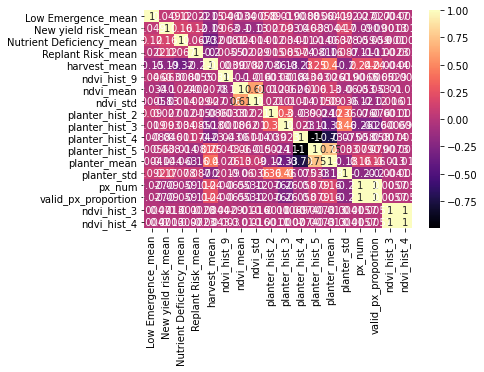

In [31]:
heatmap_columns = data[data.columns[0:5].append(data.columns[22:]).append(data.columns[16:18])]
sns.heatmap(heatmap_columns.corr(), annot=True, cmap='magma')
#5-15 and 16-20
# planter_hist 2 and mean
heatmap_columns.corr()

### Conclusion
*valid_px_proportion and px_num* columns are linearly dependent, so we drop *px_num*. *planter_hist_4 and planter_hist_5* are perfect negatively correlated.

In [ ]:
# px_num = valid_px_proportion * 1024 * 1024
data = data.drop(columns=['px_num'])

In [18]:
len(data.columns)

32

## Summary
10 columns - *crop_type, field_info, tile_number, px_num, ndvi_hist_0, planter_hist_0,1,6,7,8*  -  have been dropped. <br>
5 more columns - *ndvi_hist_1, ..., ndvi_hist_5* - have no more than 10 non-zero values and should be considered for dropping during training.